In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [138]:
df = pd.read_csv('../dataset/updated_ds_jobs_2021.csv')

#to show all rows
pd.set_option('display.max_columns', None)

In [139]:
df.sample(5)

,job_title,seniority,job_title_sim,job_description,python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,higher_degree,higher_degree_needed,avg_salary_hour,avg_salary_month,avg_salary_year,employer_provided,job_location,job_location_city,company,company_headquarters,company_headquarters_city,same_place,rating,number_of_workers,revenue(USD),founded,type_of_ownership,industry,sector,age,competitors,number_competitors
62,Data Scientist in Artificial Intelligence Earl...,na,Data Scientist,*Organization and Job ID** Job ID: Directorat...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,Master,1,32.21,5583.0,66997.0,0,Washington,Richland,Pacific Northwest National Laboratory,Washington,Richland,1,3.8,1001 - 5000,$500 million to $1 billion (USD),1965,Government,Energy,"Oil, Gas, Energy & Utilities",56,"Oak Ridge National Laboratory, National Renewa...",3
35,Web Data Analyst,na,Analyst,We are looking for a Web Data Analyst to assis...,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,None,0,50.96,8833.0,105997.0,0,California,San Jose,Clarity Insights,Illinois,Chicago,0,4.2,201 - 500,Unknown / Non-Applicable,2008,Company - Private,IT Services,Information Technology,13,No Data,0
312,Data Engineer,na,Data Engineer,"About SpringML At SpringML, we are all about ...",1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,None,0,52.40,9083.0,108992.0,0,Virginia,Herndon,SpringML,California,Pleasanton,0,4.4,1 - 50,Unknown / Non-Applicable,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,6,No Data,0
72,Data Scientist SR,sr,Data Scientist,"Data Scientist, Senior, Charlottesville, VA P...",1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,Master,1,53.85,9334.0,112008.0,0,Virginia,Charlottesville,The Buffalo Group,Virginia,Reston,0,3.9,501 - 1000,$100 to $500 million (USD),2010,Company - Private,IT Services,Information Technology,11,"ManTech, Booz Allen Hamilton, Leidos",3
552,"Marketing Data Analyst, May 2020 Undergrad",na,Analyst,Fareportal is seeking a Marketing Data Analyst...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,None,0,31.25,5417.0,65000.0,0,New York,New York,Fareportal,New York,New York,1,3.8,1001 - 5000,$2 to $5 billion (USD),2002,Company - Private,Travel Agencies,Travel & Tourism,19,"Expedia Group, Orbitz Worldwide, Priceline.com",3


In [140]:
df[['avg_salary_hour', 'avg_salary_month', 'avg_salary_year', 'rating', 'number_of_workers', 'revenue(USD)', 'age', 'number_competitors' ]].describe()

,avg_salary_hour,avg_salary_month,avg_salary_year,rating,age,number_competitors
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,49.577119,8593.382271,103120.416898,3.669806,48.202216,1.080332
std,17.674990,3063.662482,36763.988856,0.598127,53.754082,1.392142
min,7.450000,1291.000000,15496.000000,0.000000,0.000000,0.000000
25%,36.780000,6375.000000,76502.000000,3.300000,13.000000,0.000000
50%,47.480000,8230.000000,98758.500000,3.700000,26.000000,0.000000
75%,59.560000,10323.500000,123885.000000,4.000000,60.000000,3.000000
max,122.120000,21168.000000,254010.000000,5.000000,277.000000,4.000000


What we will do:

MELHORAR OS GRAFICOS

- word map for job_title [Done]
- word map for job_title_sim [Done]
- word map for job_description [Done]
- map for job_location - [POWERBI]
- map for company_headquarters [POWERBI]
- compare each skill with salary [Done]
- compare rating with salary [Done]
- compare type_of_ownership with salary [Done]
- compare industry with salary [Done]
- compare number of competitors with salary [Done]
- compare higher_degree with salary [Done]
- compare employer_provided with salary [Done]
- compare job_location with salary [Done]
- compare company_headquarters with salary [Done]
- compare age with salary [Done]
- compare job_description size with salary [Done]
- compare job_title_sim size with salary [Done]
- compare revenue with salary [Done]
- compare seniority with salary [Done]


In [141]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
columns_to_exclude = ['avg_salary_hour', 'avg_salary_month']
columns_to_include = [col for col in numeric_columns if col not in columns_to_exclude]

df[columns_to_include].corr()

,python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,higher_degree_needed,avg_salary_year,employer_provided,same_place,rating,age,number_competitors
python,1.000000,0.347294,0.198213,-0.010738,0.364572,0.083101,0.190327,0.111750,0.253973,0.204663,0.238481,0.148785,0.158952,0.062734,0.093619,-0.030295,0.005582,0.279502,-0.049660,-0.001281,0.160701,-0.122186,0.079678
spark,0.347294,1.000000,0.293876,-0.051108,0.249333,-0.055399,0.109792,0.033036,0.276198,0.246067,0.525481,-0.042369,-0.064574,0.220342,0.218692,-0.051556,-0.052222,0.155900,-0.053218,-0.058756,0.159371,-0.123723,0.069176
aws,0.198213,0.293876,1.000000,-0.021788,0.103612,-0.142790,0.134919,0.111882,0.089299,0.122363,0.273591,-0.007099,0.014992,0.156983,0.192803,-0.078337,-0.053365,0.159063,0.011374,-0.058301,0.110444,-0.049645,-0.018118
excel,-0.010738,-0.051108,-0.021788,1.000000,0.115448,0.056770,-0.027977,-0.063122,-0.019993,-0.071485,0.015282,0.139946,0.064297,-0.027657,0.089280,0.115921,-0.012578,-0.103719,0.067424,0.110192,-0.053964,0.041462,-0.019851
sql,0.364572,0.249333,0.103612,0.115448,1.000000,0.201889,0.014936,-0.013415,0.096685,0.031814,0.263841,0.370788,0.244179,-0.051039,0.193129,0.056007,-0.115302,-0.038694,-0.102008,0.124535,0.126729,-0.137144,0.056011
sas,0.083101,-0.055399,-0.142790,0.056770,0.201889,1.000000,-0.064886,-0.054535,0.019434,-0.056332,-0.075212,0.155897,0.055973,-0.037591,0.107422,0.094806,0.127739,0.091400,-0.031385,-0.003761,-0.026592,0.027167,-0.001043
keras,0.190327,0.109792,0.134919,-0.027977,0.014936,-0.064886,1.000000,0.356787,0.504964,0.548364,0.004967,-0.030864,-0.058162,-0.024243,0.052360,0.022389,-0.097950,0.110504,-0.020241,-0.034561,0.087044,-0.069318,-0.016883
pytorch,0.111750,0.033036,0.111882,-0.063122,-0.013415,-0.054535,0.356787,1.000000,0.397902,0.641268,-0.039338,-0.118755,-0.067941,-0.028319,-0.053936,-0.033602,0.064460,0.035652,-0.023644,0.023581,0.059226,-0.042989,-0.004990
scikit,0.253973,0.276198,0.089299,-0.019993,0.096685,0.019434,0.504964,0.397902,1.000000,0.524975,0.144879,-0.035608,-0.000776,0.056408,0.033887,-0.001798,0.032111,0.171768,-0.028132,-0.006269,0.125355,-0.086248,-0.088327
tensor,0.204663,0.246067,0.122363,-0.071485,0.031814,-0.056332,0.548364,0.641268,0.524975,1.000000,-0.007596,-0.129109,-0.093896,0.120060,-0.009569,-0.012708,0.064021,0.150919,-0.032676,-0.030225,0.102284,-0.056921,0.051143


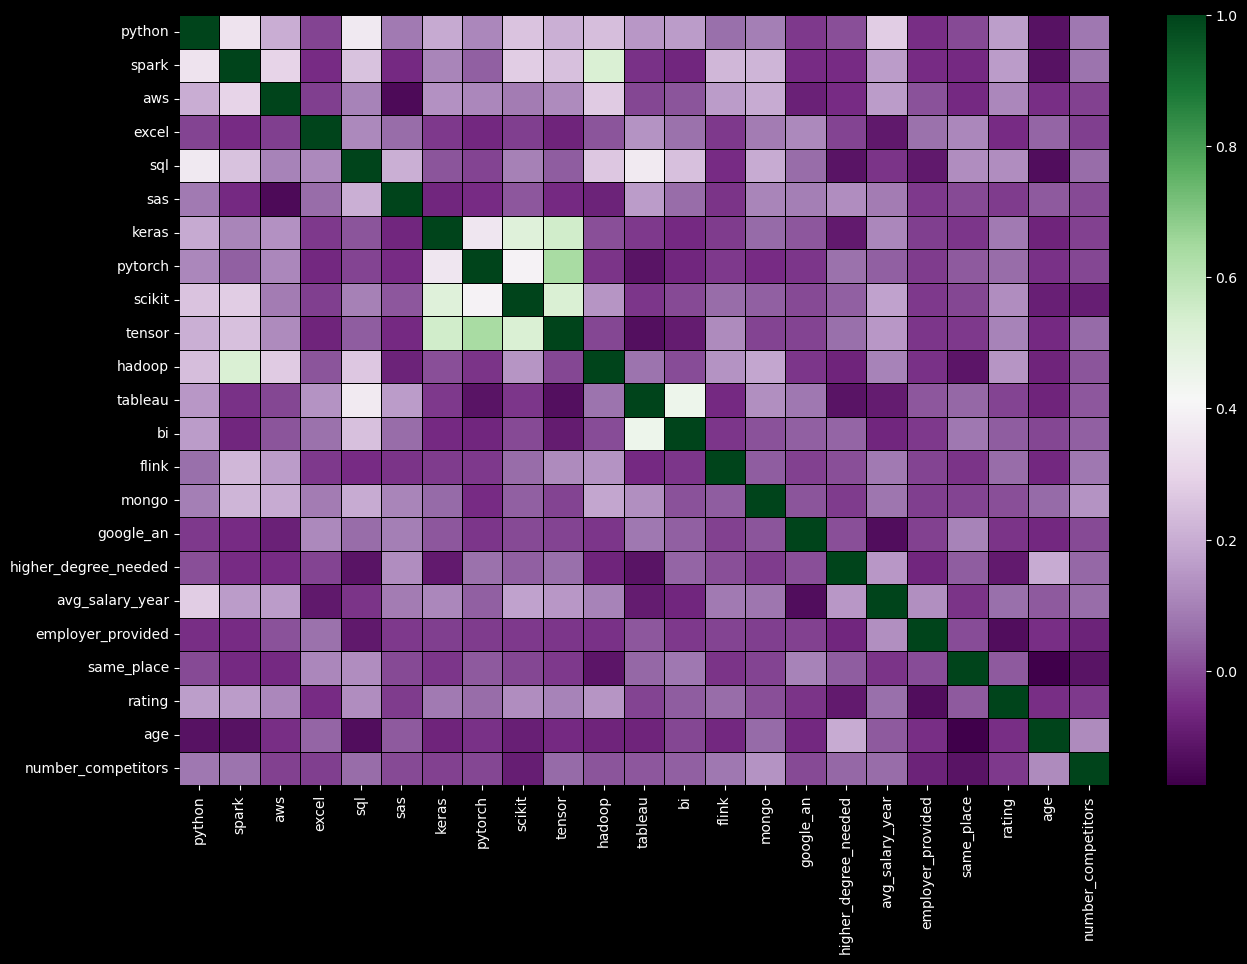

In [142]:
# Set a dark background style for the plots
plt.style.use('dark_background')
plt.figure(figsize=(15, 10))
sns.heatmap(df[columns_to_include].corr(), annot=False, cmap='PRGn', linecolor='black', linewidths=0.5)
plt.show()

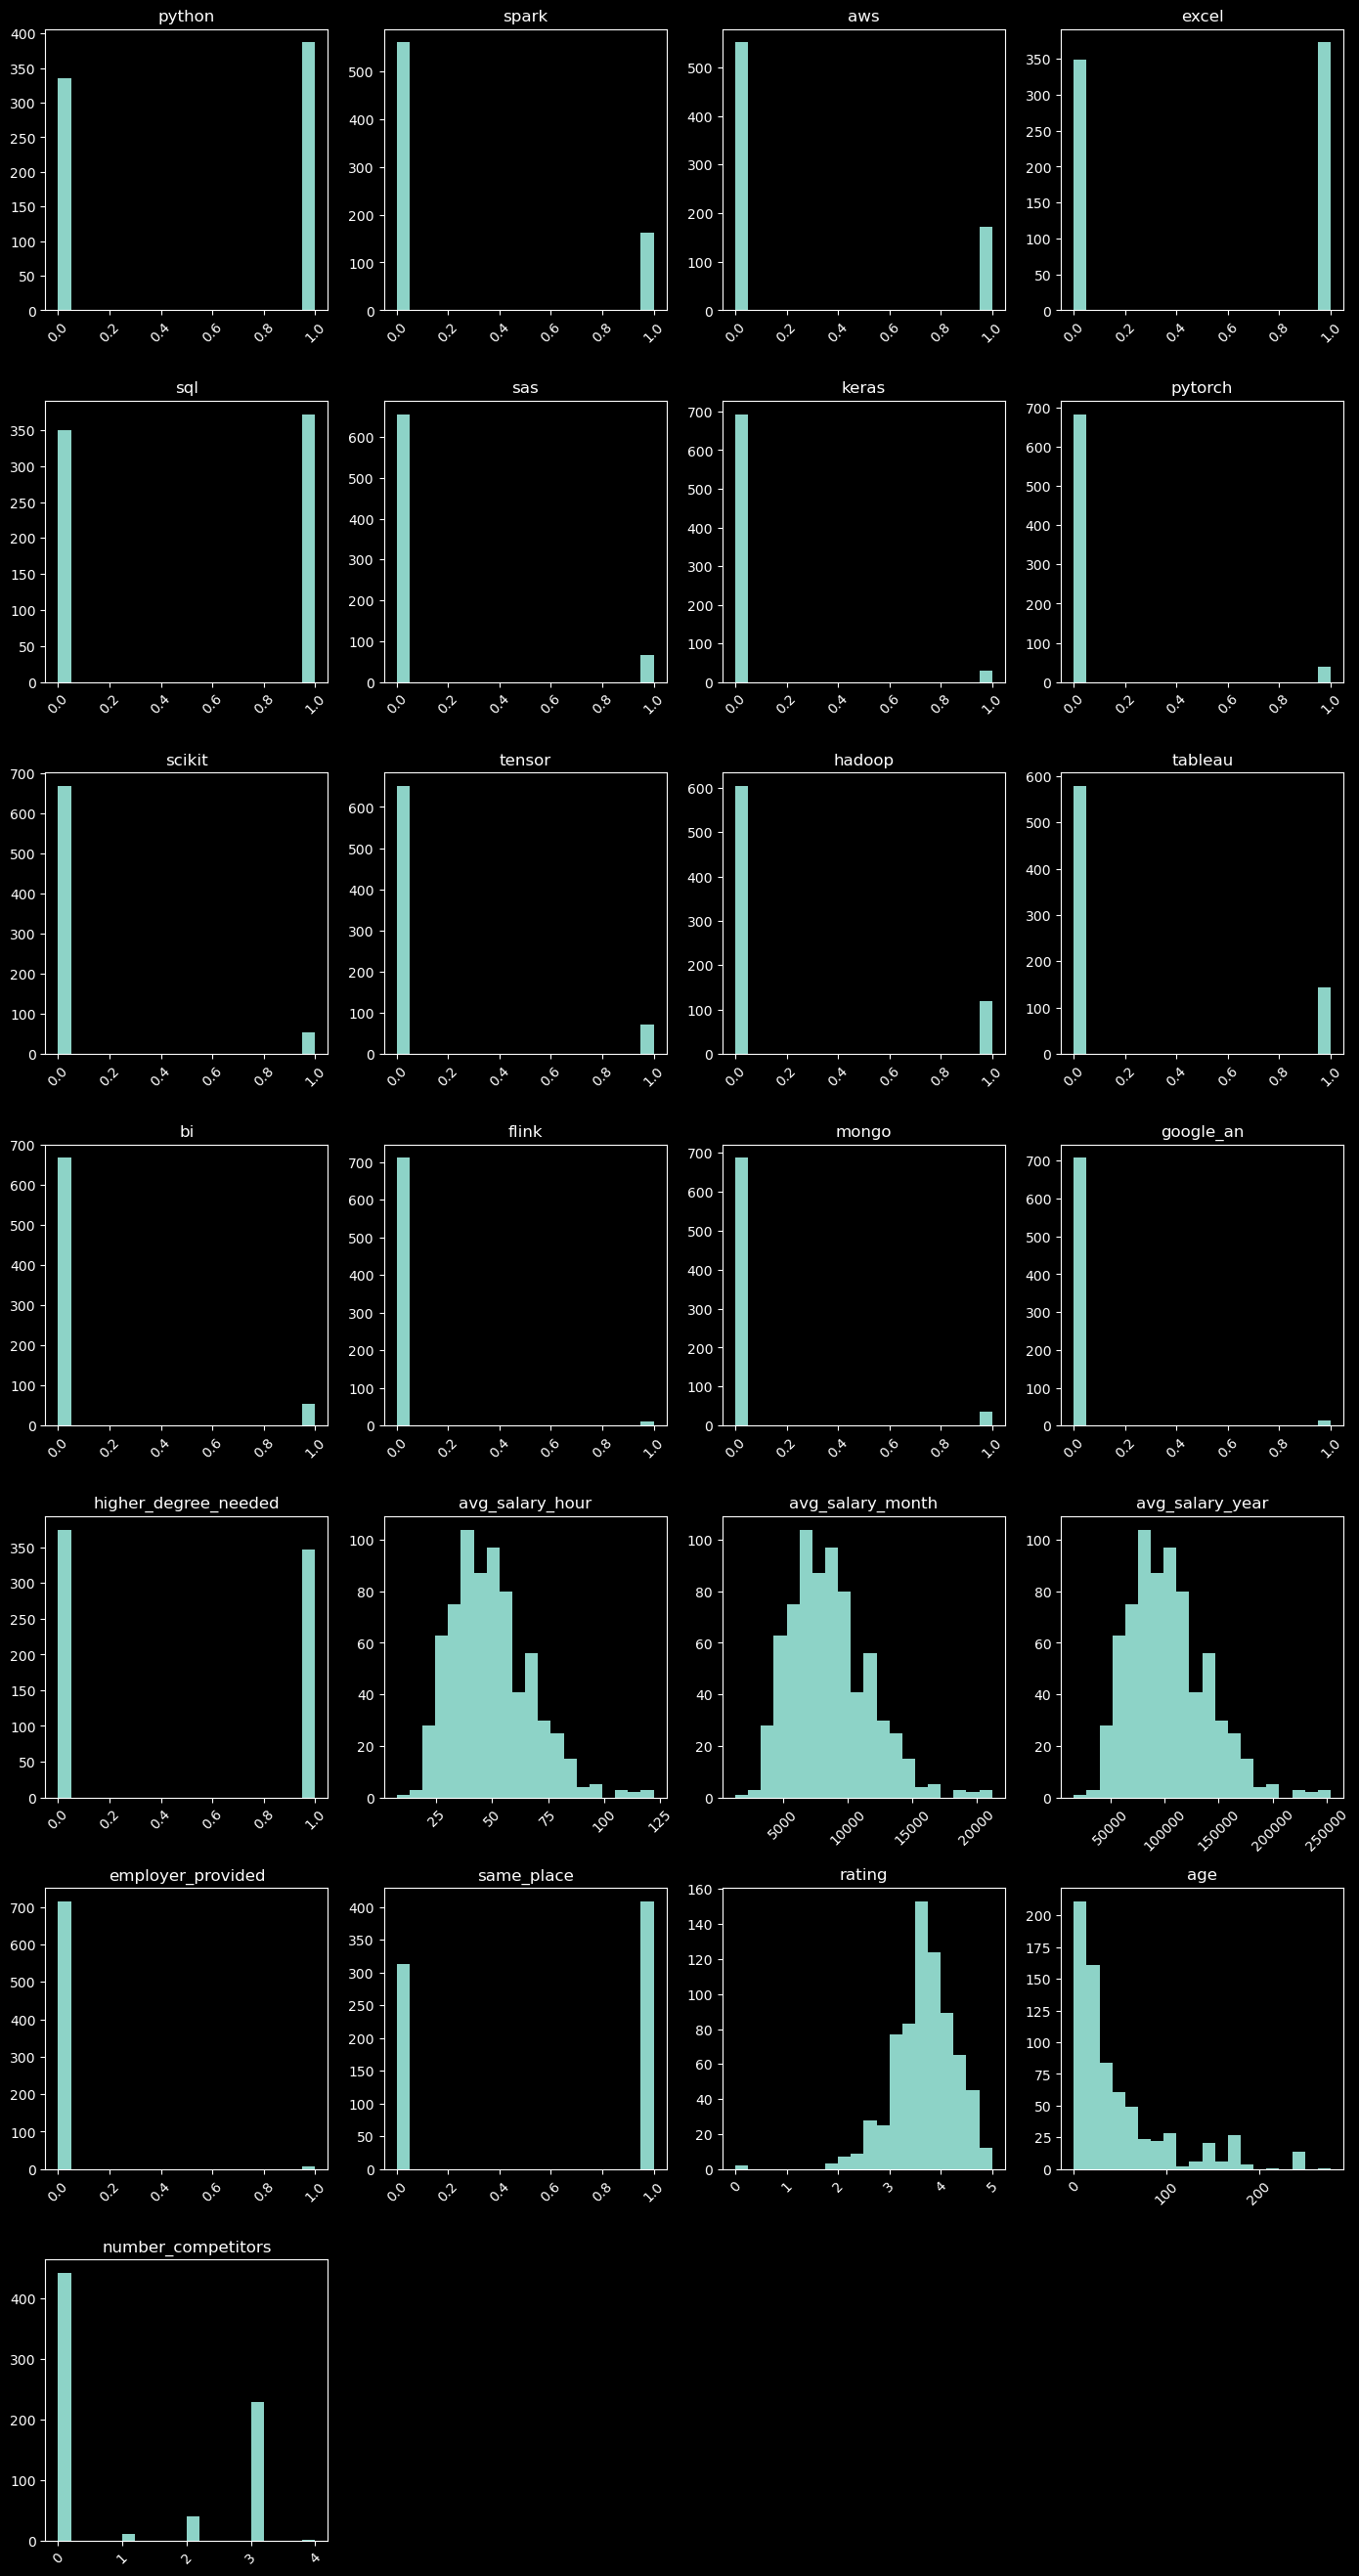

In [143]:
# Plot histograms for all numeric columns with larger figure size, rotated x-axis labels, some space between subplots, and dark background
df.hist(figsize=(14, 30), xrot=45, layout=(8, 4), bins=20, grid=False)
plt.tight_layout()
plt.show()

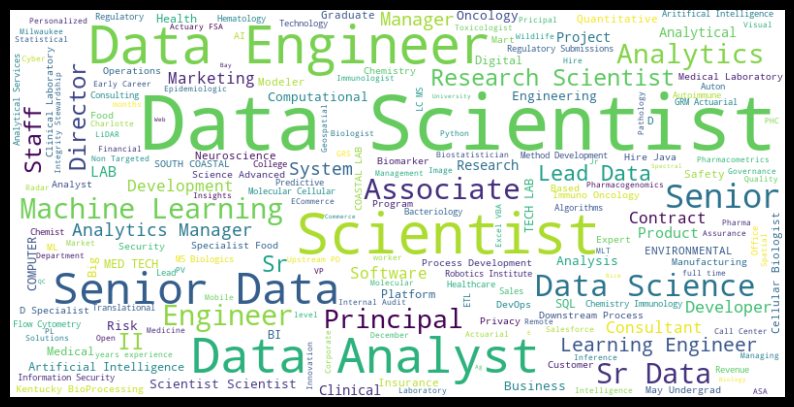

In [144]:
# Generate a word cloud for the 'job_title' column
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['job_title']))

# Display the word cloud for job_title
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.show()


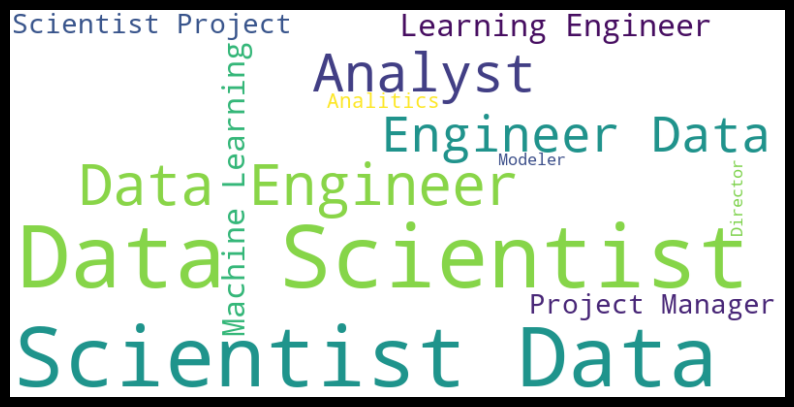

In [145]:
# Generate a word cloud for the 'job_title_sim' column
wordcloud_title_sim = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['job_title_sim']))

# Display the word cloud for job_title_sim
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_title_sim, interpolation='bilinear')
plt.axis('off')
plt.show()

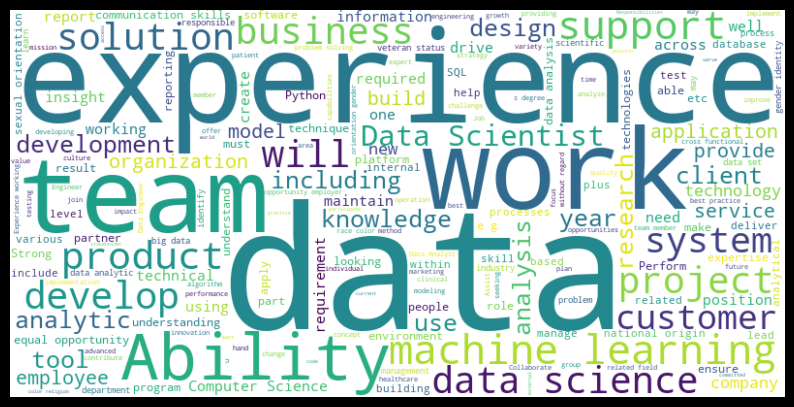

In [146]:
# Generate a word cloud for the 'job_description' column
wordcloud_description = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['job_description']))

# Display the word cloud for job_description
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis('off')
plt.show()

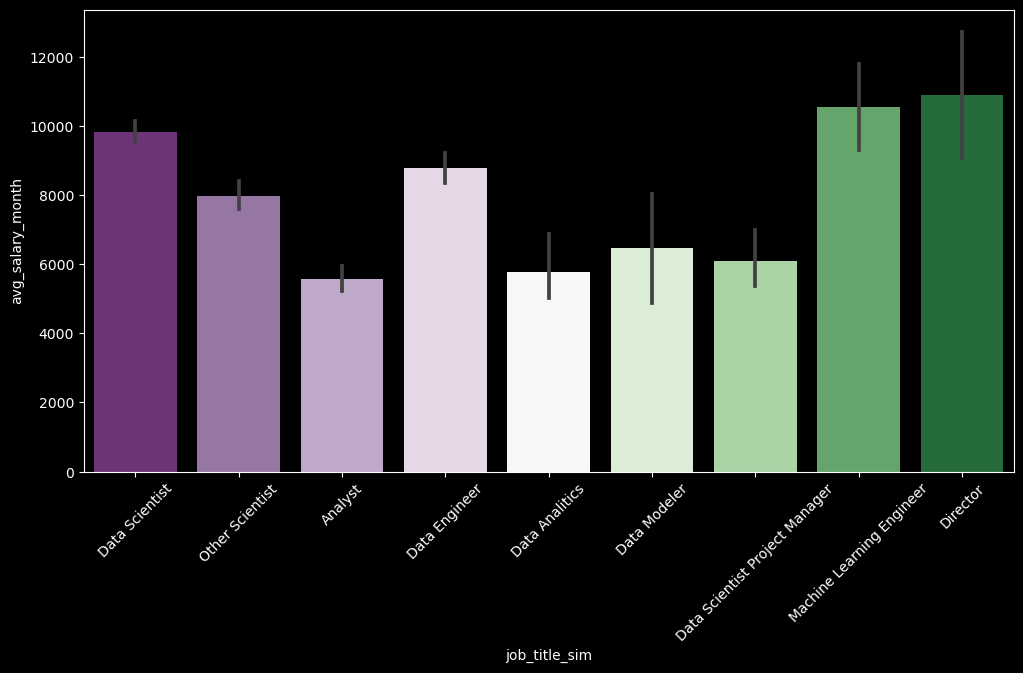

In [147]:
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title_sim', y='avg_salary_month', data=df, palette='PRGn')
plt.xticks(rotation=45)
plt.show()

In [148]:
pd.pivot_table(df, index = ['job_title_sim','seniority'], values = 'avg_salary_month')

avg_salary_month
job_title_sim                  seniority                  
Analyst                        jr              4437.500000
                               na              5101.486111
                               sr              6860.925926
Data Analitics                 na              5771.250000
Data Engineer                  na              8058.390244
                               sr             10390.837838
Data Modeler                   na              6458.600000
Data Scientist                 jr              8875.000000
                               na              9146.799043
                               sr             11299.220000
Data Scientist Project Manager na              6101.812500
Director                       na             10900.200000
Machine Learning Engineer      na              9928.066667
                               sr             11839.571429
Other Scientist                na              7369.217391
                               sr              9247.931818

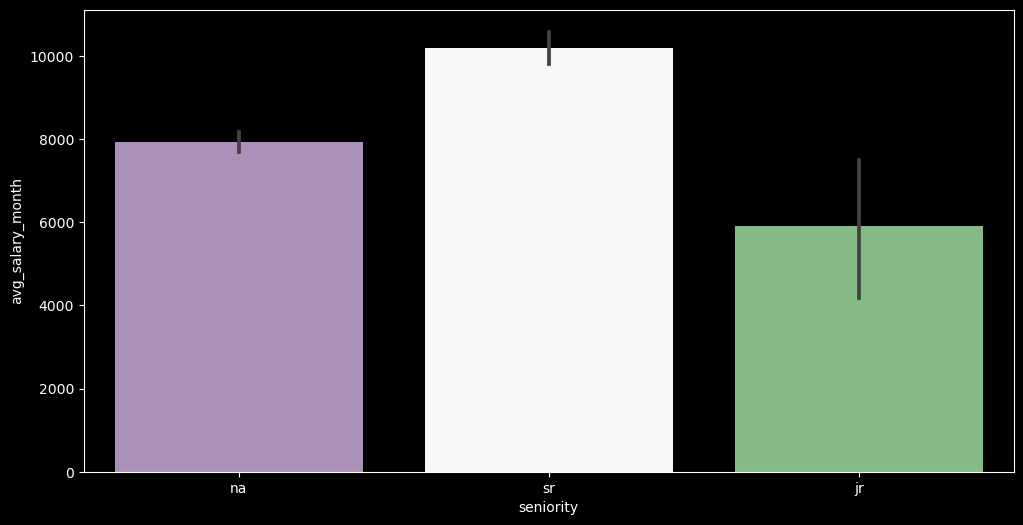

In [149]:
plt.figure(figsize=(12, 6))
sns.barplot(x='seniority', y='avg_salary_month', data=df, palette='PRGn')
plt.show()

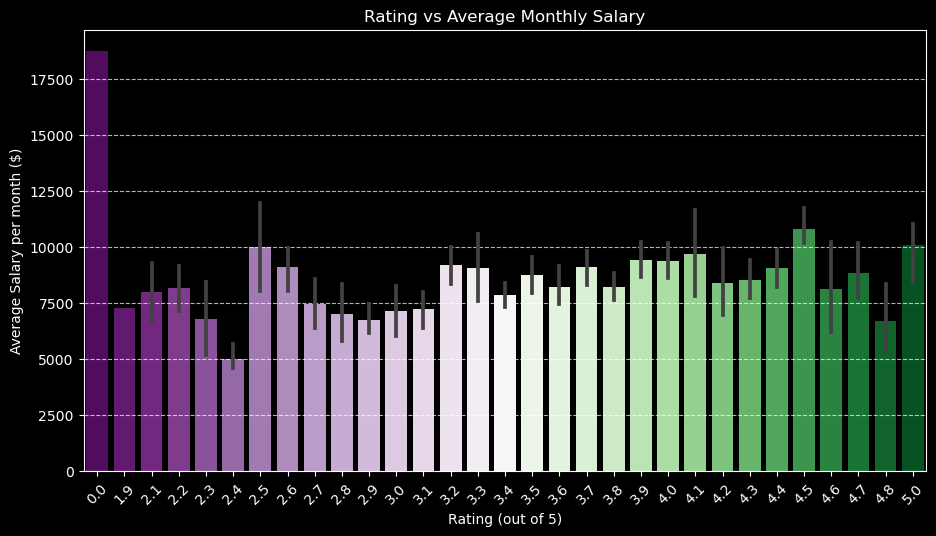

In [150]:
# Extracting rating and avg_salary_month columns
ratings = df['rating']
avg_salary = df['avg_salary_month']

# Creating a bar plot with seaborn 
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='avg_salary_month', data=df, palette='PRGn', saturation=1)
plt.xlabel('Rating (out of 5)')
plt.ylabel('Average Salary per month ($)')
plt.title('Rating vs Average Monthly Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.show()

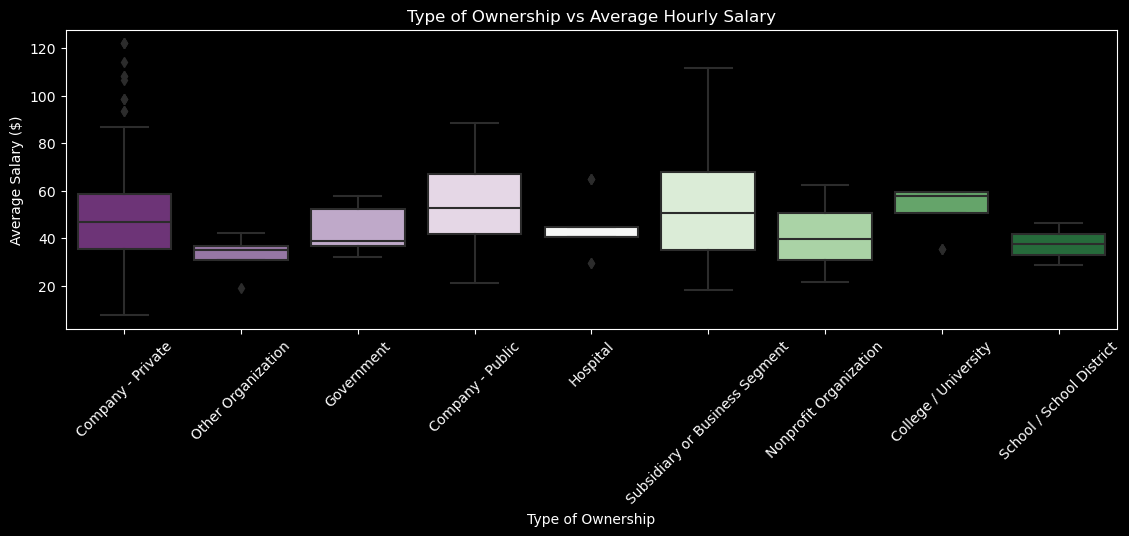

In [151]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type_of_ownership', y='avg_salary_hour', data=df, palette='PRGn')
plt.xlabel('Type of Ownership')
plt.ylabel('Average Salary ($)')
plt.title('Type of Ownership vs Average Hourly Salary')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.show()

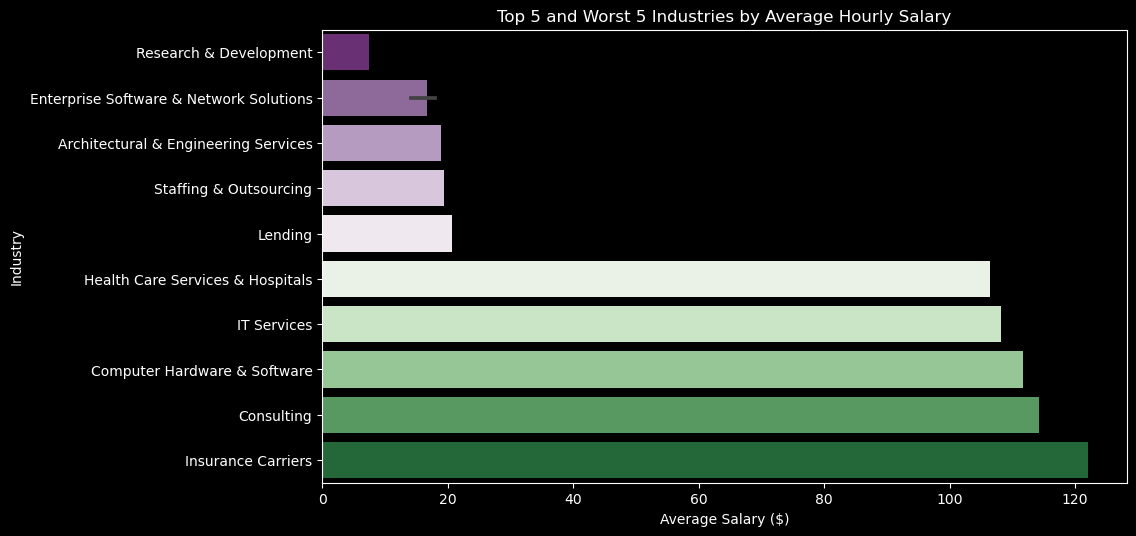

In [152]:
# Sort the DataFrame by avg_salary_hour($) in ascending order
df_sorted = df.sort_values('avg_salary_hour', ascending=True)

# Get the top 5 and worst 5 entries
df_top_worst = pd.concat([df_sorted.head(8), df_sorted.tail(8)])

# Create the bar plot for the top and worst 5 industries
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_salary_hour', y='industry', data=df_top_worst, palette='PRGn')
plt.xlabel('Average Salary ($)')
plt.ylabel('Industry')
plt.title('Top 5 and Worst 5 Industries by Average Hourly Salary')
plt.tight_layout(pad=3.0)
plt.show()

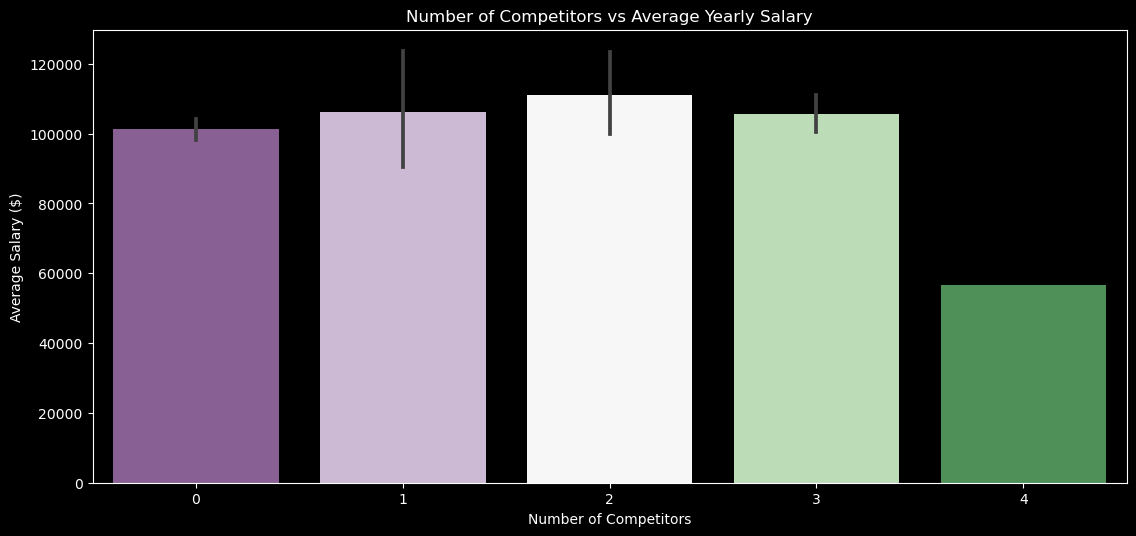

In [153]:
plt.figure(figsize=(12, 6))
sns.barplot(x='number_competitors', y='avg_salary_year', data=df, palette='PRGn')
plt.xlabel('Number of Competitors')
plt.ylabel('Average Salary ($)')
plt.title('Number of Competitors vs Average Yearly Salary')
plt.tight_layout(pad=3.0)
plt.show()

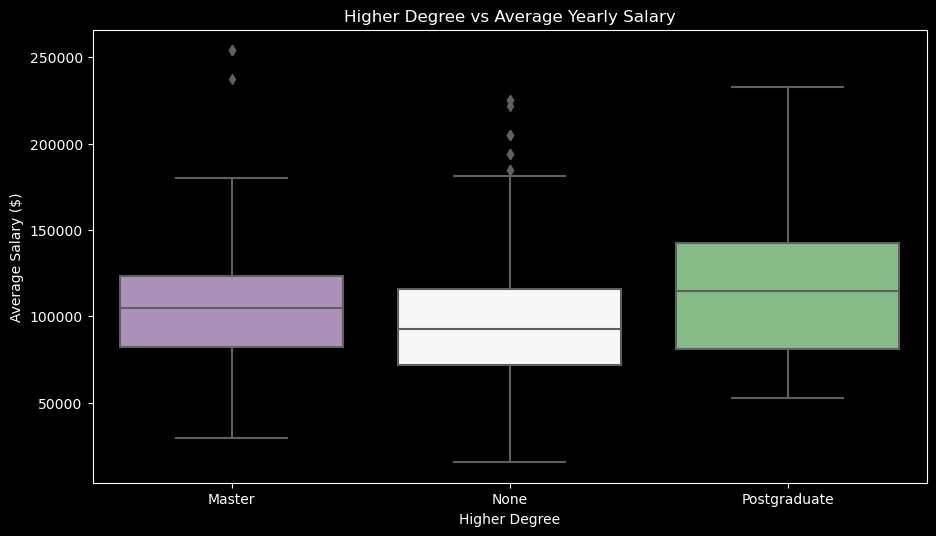

In [154]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='higher_degree', y='avg_salary_year', data=df, palette='PRGn')
plt.xlabel('Higher Degree')
plt.ylabel('Average Salary ($)')
plt.title('Higher Degree vs Average Yearly Salary')
plt.tight_layout(pad=3.0)
plt.show()

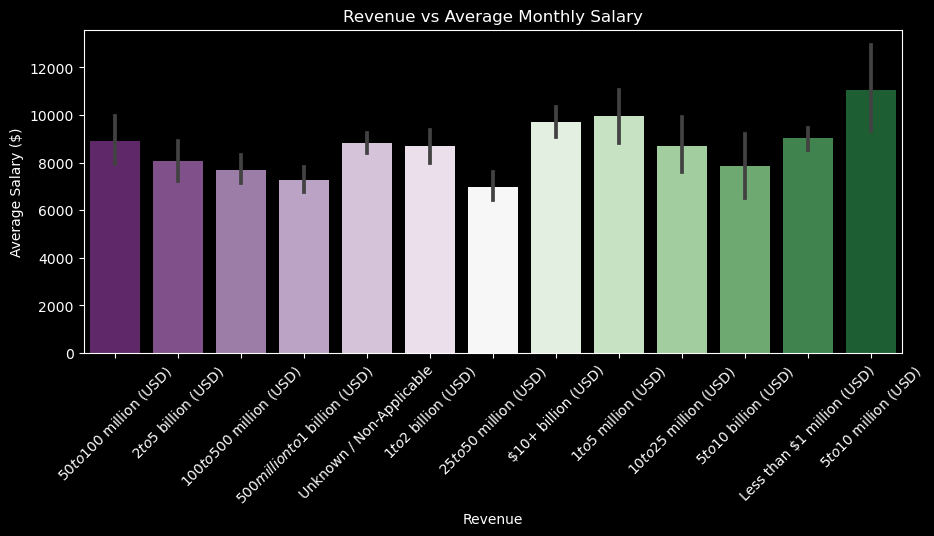

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue(USD)', y='avg_salary_month', data=df, palette='PRGn')
plt.xlabel('Revenue')
plt.ylabel('Average Salary ($)')
plt.title('Revenue vs Average Monthly Salary')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.show()

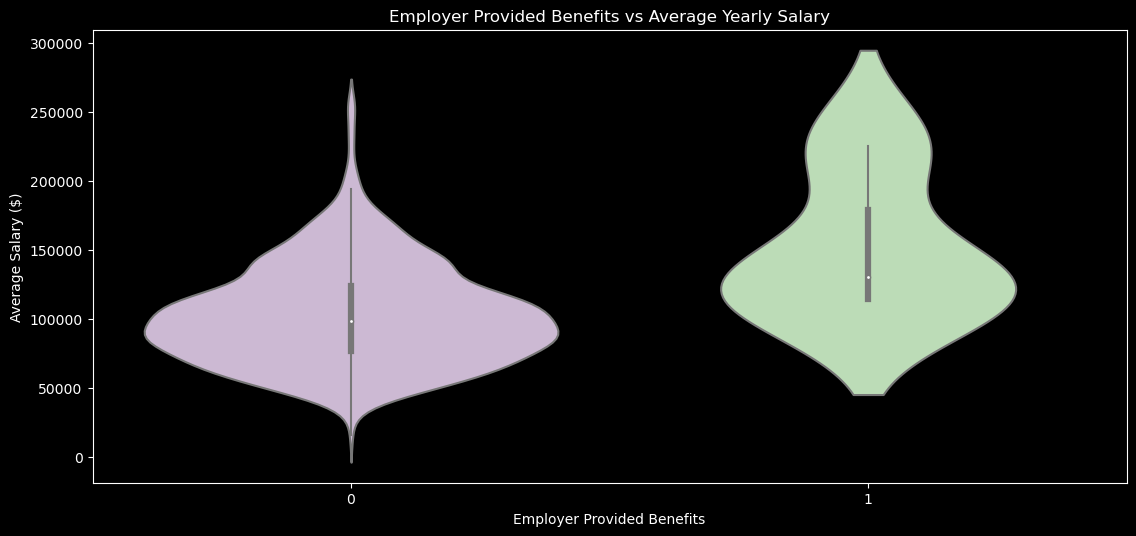

In [156]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='employer_provided', y='avg_salary_year', data=df, palette='PRGn')
plt.xlabel('Employer Provided Benefits')
plt.ylabel('Average Salary ($)')
plt.title('Employer Provided Benefits vs Average Yearly Salary')
plt.tight_layout(pad=3.0)
plt.show()

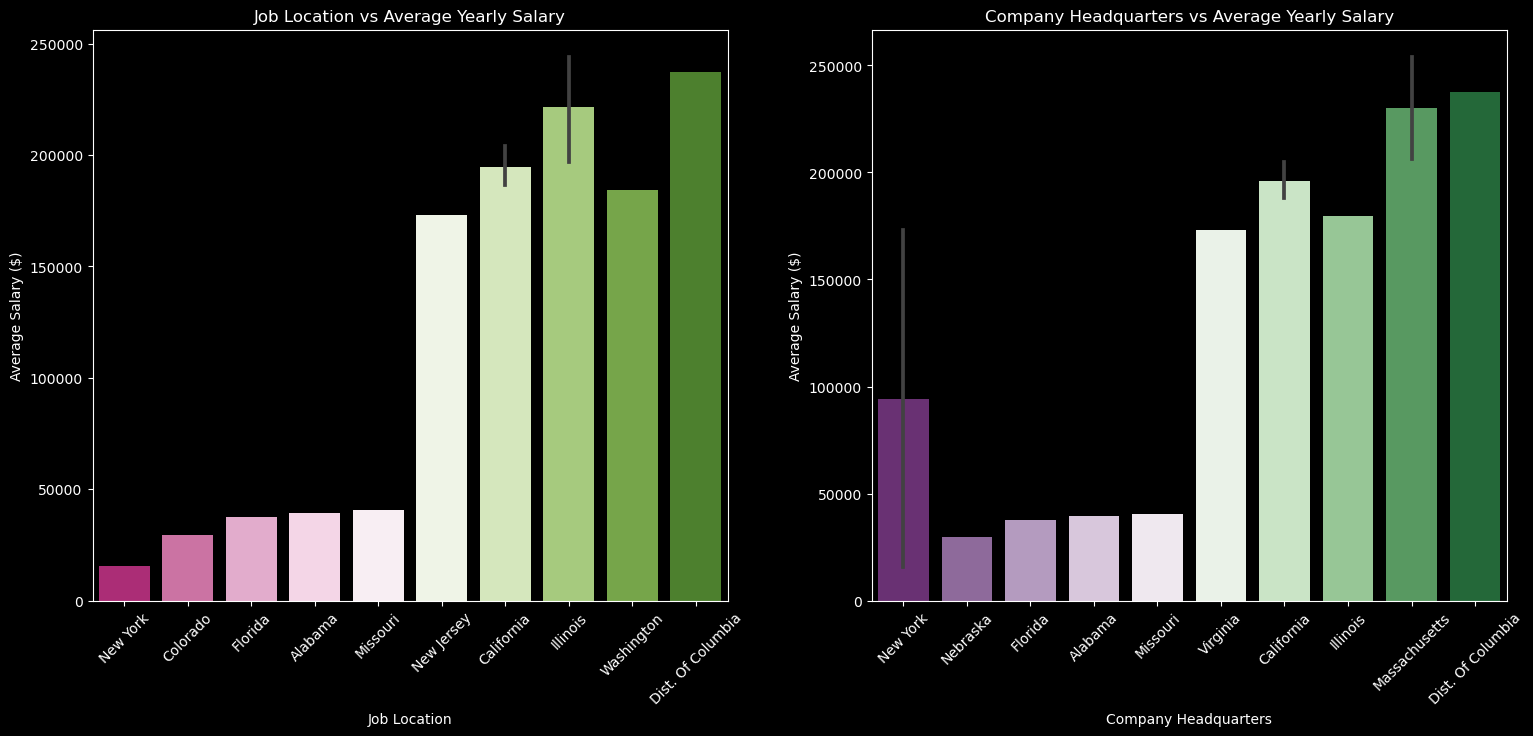

In [157]:
# Sort the DataFrame by avg_salary_hour($) in ascending order
df_sorted = df.sort_values('avg_salary_hour', ascending=True)

# Get the top 5 and worst 5 entries
df_top_worst = pd.concat([df_sorted.head(6), df_sorted.tail(28)])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='job_location', y='avg_salary_year', data=df_top_worst, palette='PiYG')
plt.xlabel('Job Location')
plt.ylabel('Average Salary ($)')
plt.title('Job Location vs Average Yearly Salary')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='company_headquarters', y='avg_salary_year', data=df_top_worst, palette='PRGn')
plt.xlabel('Company Headquarters')
plt.ylabel('Average Salary ($)')
plt.title('Company Headquarters vs Average Yearly Salary')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.show()

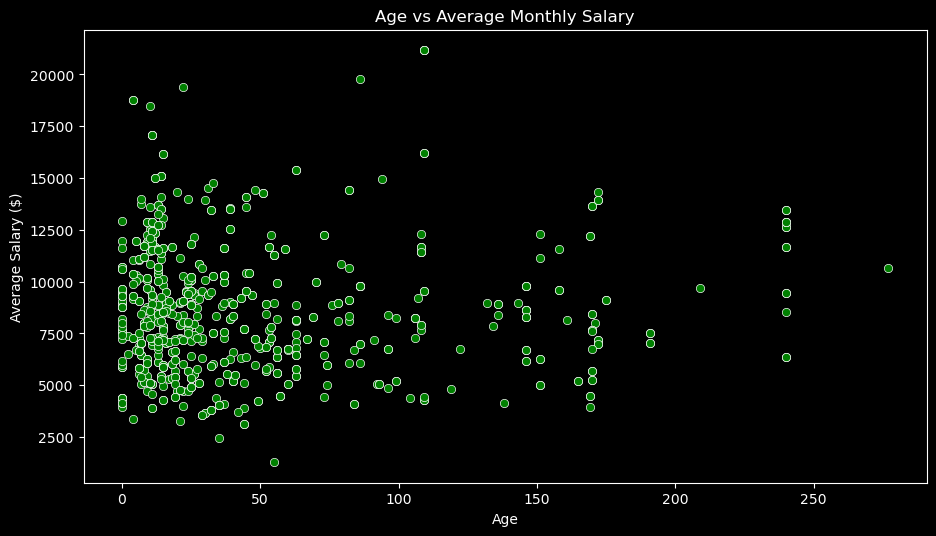

In [158]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_salary_month', data=df, color='green')
plt.xlabel('Age')
plt.ylabel('Average Salary ($)')
plt.title('Age vs Average Monthly Salary')
plt.tight_layout(pad=3.0)
plt.show()

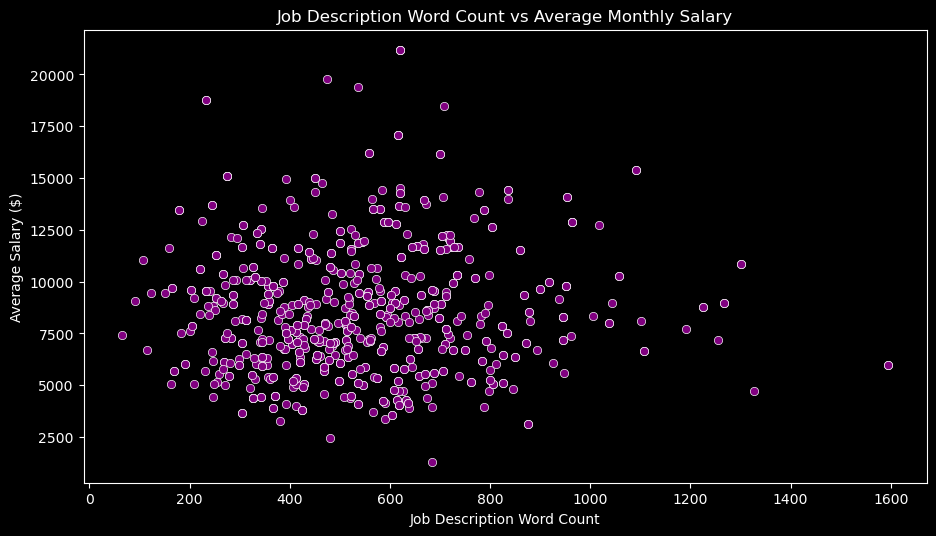

In [159]:
plt.figure(figsize=(10, 6))
df['job_description_word_count'] = df['job_description'].apply(lambda x: len(x.split()))
sns.scatterplot(x='job_description_word_count', y='avg_salary_month', data=df, color='purple')
plt.xlabel('Job Description Word Count')
plt.ylabel('Average Salary ($)')
plt.title('Job Description Word Count vs Average Monthly Salary')
plt.tight_layout(pad=3.0)
plt.show()

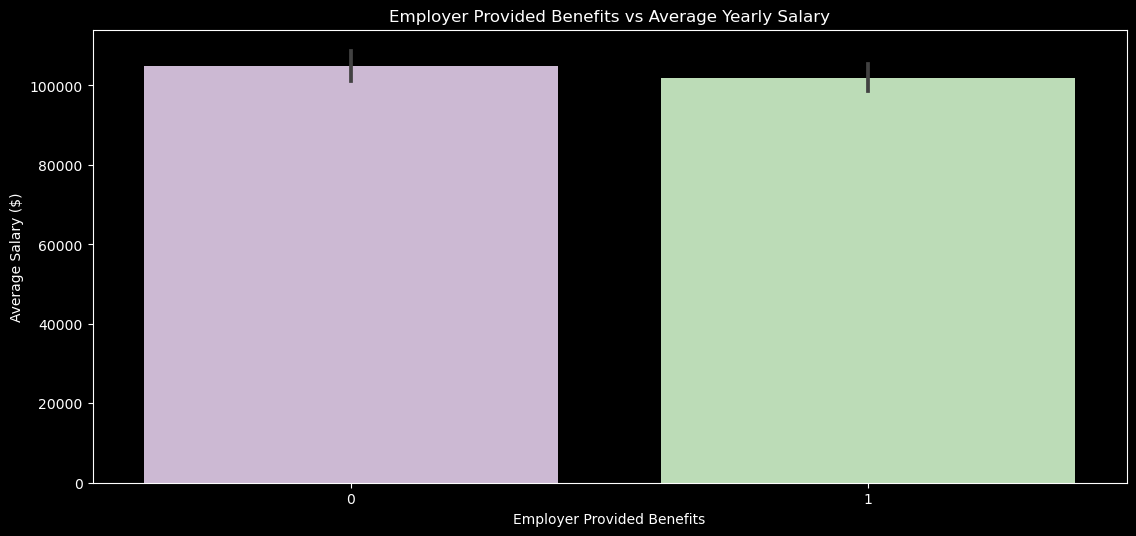

In [160]:
#0 = Not same place, 1 = Same place

plt.figure(figsize=(12, 6))
sns.barplot(x='same_place', y='avg_salary_year', data=df, palette='PRGn')
plt.xlabel('Employer Provided Benefits')
plt.ylabel('Average Salary ($)')
plt.title('Employer Provided Benefits vs Average Yearly Salary')
plt.tight_layout(pad=3.0)
plt.show()

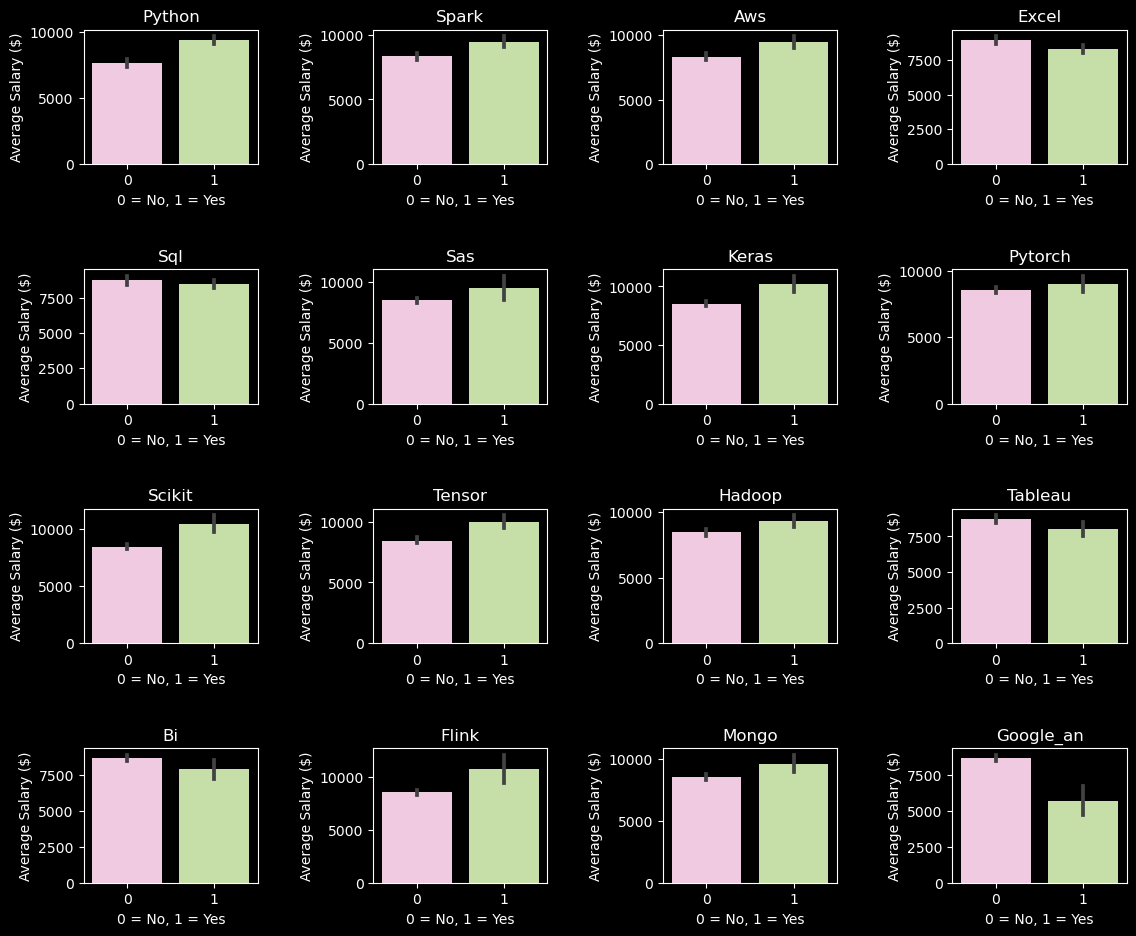

In [161]:
skills = ['python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
plt.figure(figsize=(12, 10))

for i, skill in enumerate(skills):
    plt.subplot(4, 4, i+1)
    sns.barplot(x=skill, y='avg_salary_month', data=df, palette='PiYG')
    plt.xlabel('0 = No, 1 = Yes')
    plt.ylabel('Average Salary ($)')
    plt.title(skill.capitalize())


plt.tight_layout(pad=3.0)
plt.show()

In [162]:
df.columns

Index(['job_title', 'seniority', 'job_title_sim', 'job_description', 'python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'higher_degree', 'higher_degree_needed', 'avg_salary_hour',
       'avg_salary_month', 'avg_salary_year', 'employer_provided',
       'job_location', 'job_location_city', 'company', 'company_headquarters',
       'company_headquarters_city', 'same_place', 'rating',
       'number_of_workers', 'revenue(USD)', 'founded', 'type_of_ownership',
       'industry', 'sector', 'age', 'competitors', 'number_competitors',
       'job_description_word_count'],
      dtype='object')